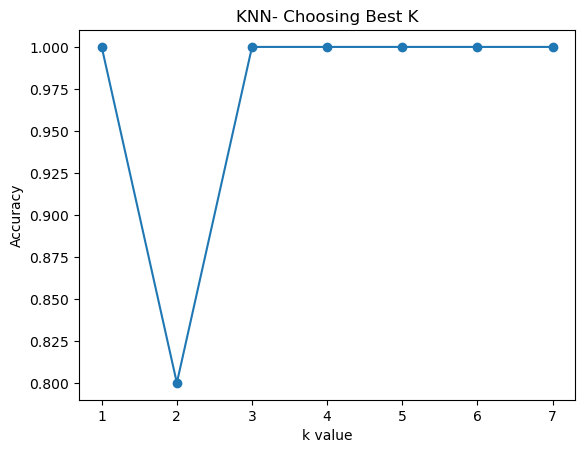

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("Knn_Customers.csv")

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_list = []
k_values = range(1, 8)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(accuracy_score(y_test,y_pred))

plt.plot(k_values,accuracy_list,marker='o')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("KNN- Choosing Best K")
plt.show()

In [2]:
best_k = k_values[np.argmax(accuracy_list)]
print("Best K:", best_k)

Best K: 1


In [3]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train,y_train)

y_pred = knn_final.predict(X_test)

df= pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

   Actual  Predicted
0       0          0
1       1          1
2       0          0
3       1          1
4       0          0


In [4]:
import joblib
joblib.dump(knn_final, "knn_customer_model.pkl")
joblib.dump(sc, "scaler.pkl")

print("KNN Model and Scaler saved Succesfully!")

KNN Model and Scaler saved Succesfully!
